# Exemples AD avec Python 
<font color="red"> Version Elèves </font>

## AD avec données météo (catégorielles)

### Encoding remplace les données énumérées par des nbrs puis ces valeurs sont traités comme des nbrs.  
Par ex, on se retrouve avec un test "outlook <= 8.5". !!   
Use dumies de  panda

In [25]:
# Les libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [27]:
### Pour tout afficher (san sprint)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Infos sur les fonctions utilisées  
**LabelEncoder()** --> création de l'instance (objet)  
**fit(self, y)** --> Fit label encoder  (créer l'encodage avec les y -- données = str -- )  
**transform(self, y)** -->  Transform labels to normalized encoding.  = utilisation  
**fit_transform(self, y)** -->  Fit label encoder and return encoded labels (donc fit + transform)  
**inverse_transform(self, y)** -->  Transform labels back to original encoding.  
?? **get_params(self[, deep])**-->  Get parameters for this estimator. (<font color="green"> voir plus bas</font>)  
?? **set_params(self, \*\*params)** -->  Set the parameters of this estimator.  

 <font color="red"> l'ordre d'affectation de nombre est alphanumérique</font>

In [28]:
# Par exemple : 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "amsterdam", "paris"]) 
# [2, 0, 1]
# Car (dans l'ordre) "amsterdam" = 0, "paris"=1, "tokyo"=2

le.transform(["tokyo", "tokyo", "paris"]) 
# Donne array([2, 2, 1])

LabelEncoder()

array([2, 0, 1])

array([2, 2, 1])

### Revenons au fichier weather-nominal de weka  

A partir des infos ci-dessus, on a les strings qu'il faudra encoder pour notre BD weather:

In [30]:
le.fit(["yes", "no", "sunny", "overcast", "rainy", "hot", "mild",
        "cool", "high", "normal", "False", "True"])
le.transform(["yes", "no", "sunny"])
le.transform(["sunny", "overcast", "rainy"])

LabelEncoder()

array([11,  6, 10])

array([10,  8,  9])

#### Contrairement à la documentation, "le.get_params(deep=True)" ne donne rien !!?
Pour extraire ce que l'encodeur a stocké, j'ai trouvé cette solution. Pas mieux ?

In [31]:
# le.get_params() #deep=True
# NE donne rien ??!!

keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
# Ou comme ceci : dictionary = dict(zip(le.classes_, le.transform(le.classes_)))
print(dictionary)

{'False': 0, 'True': 1, 'cool': 2, 'high': 3, 'hot': 4, 'mild': 5, 'no': 6, 'normal': 7, 'overcast': 8, 'rainy': 9, 'sunny': 10, 'yes': 11}


In [32]:
# Un peu d'info (moins riche que ci-dessus) :
list(le.classes_)

list(le.inverse_transform([2, 5, 1, 10]))

['False',
 'True',
 'cool',
 'high',
 'hot',
 'mild',
 'no',
 'normal',
 'overcast',
 'rainy',
 'sunny',
 'yes']

['cool', 'mild', 'True', 'sunny']

### Lecture des données

In [7]:
col_names = ['outlook', 'temperature', 'humidity', 'windy', 'play']
df = pd.read_csv("weather.csv") # Eventuellement ,  encoding="utf-16")  
# par défaut : header = 'infer' (il prend la 1e ligne comme header)
# voir aussi true_values=None, false_values=None, (pour la conversion de la col windy)
# le paramètre usecols= ['outlook', 'temperature', 'humidity', 'windy', 'play'] peut être donné.
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [8]:
# 2 première lignes 
df.head(2)

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no


In [9]:
df.shape  # les dimensions (15 lignes et 5 cols)

(14, 5)

In [10]:
# Les colonnes : de 2 façons
df.columns  # OU
df.columns.values

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

array(['outlook', 'temperature', 'humidity', 'windy', 'play'],
      dtype=object)

In [11]:
# sous forme d'une liste (pour les manips éventuelles)
list(df.columns.values)

['outlook', 'temperature', 'humidity', 'windy', 'play']

### Transcodage colonne par colonne  
L'encodeur utilise l'ordre alphanumérique.   
On ne peut donc pas lui imposer que par exemple, "yes"=1 et "no"=0 (comme c'est souvent le cas)

### L'encodage des valeurs de la BD (avec trace)  
Voir en bas de ce document pour les conseils sous pandas.
 

In [12]:
# Convertir d'abord True / False de "windy" en 1/0
import numpy as np
df["windy"] = df["windy"].astype(int)
#df["windy"] = np.where(df["windy"]==True, 1, 0) # si = True alors 1 sinon 0

df_encode=pd.DataFrame([]) # il a fallu ajouter cela sous Mac !

# Convertir les autres colonnes (on peut donner explicitement les noms des cols)
for lab in df.columns.values :
    if lab == "windy" : 
        df_encode["windy"]=df["windy"]
        continue # déjà fait 
    print("On travaille avec le label", lab, ": ")
    print(df[lab].values, "\n --> devient ", end="")
    res=le.transform(df[lab])
    print(res)
    df_encode[lab]=res
#df_encode["windy"]=df["windy"]

On travaille avec le label outlook : 
['sunny' 'sunny' 'overcast' 'rainy' 'rainy' 'rainy' 'overcast' 'sunny'
 'sunny' 'rainy' 'sunny' 'overcast' 'overcast' 'rainy'] 
 --> devient [10 10  8  9  9  9  8 10 10  9 10  8  8  9]
On travaille avec le label temperature : 
['hot' 'hot' 'hot' 'mild' 'cool' 'cool' 'cool' 'mild' 'cool' 'mild' 'mild'
 'mild' 'hot' 'mild'] 
 --> devient [4 4 4 5 2 2 2 5 2 5 5 5 4 5]
On travaille avec le label humidity : 
['high' 'high' 'high' 'high' 'normal' 'normal' 'normal' 'high' 'normal'
 'normal' 'normal' 'high' 'normal' 'high'] 
 --> devient [3 3 3 3 7 7 7 3 7 7 7 3 7 3]
On travaille avec le label play : 
['no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no'] 
 --> devient [ 6  6 11 11 11  6 11  6 11 11 11 11 11  6]


In [13]:
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,0,no
1,sunny,hot,high,1,no
2,overcast,hot,high,0,yes
3,rainy,mild,high,0,yes
4,rainy,cool,normal,0,yes
5,rainy,cool,normal,1,no
6,overcast,cool,normal,1,yes
7,sunny,mild,high,0,no
8,sunny,cool,normal,0,yes
9,rainy,mild,normal,0,yes


In [14]:
df_encode

,outlook,temperature,humidity,windy,play
0,10,4,3,0,6
1,10,4,3,1,6
2,8,4,3,0,11
3,9,5,3,0,11
4,9,2,7,0,11
5,9,2,7,1,6
6,8,2,7,1,11
7,10,5,3,0,6
8,10,2,7,0,11
9,9,5,7,0,11


### On a donc maintenant un data framle (BD en mémoire)  numérique.  
On va désigner la colonne décision (les autres : var explicatives).

In [15]:
feature_cols = col_names[:-1] # tout sauf dernière colonne
X = df_encode[feature_cols] # Features
y = df_encode.play # Target variable
X, y

(    outlook  temperature  humidity  windy
 0        10            4         3      0
 1        10            4         3      1
 2         8            4         3      0
 3         9            5         3      0
 4         9            2         7      0
 5         9            2         7      1
 6         8            2         7      1
 7        10            5         3      0
 8        10            2         7      0
 9         9            5         7      0
 10       10            5         7      1
 11        8            5         3      1
 12        8            4         7      0
 13        9            5         3      1,
 0      6
 1      6
 2     11
 3     11
 4     11
 5      6
 6     11
 7      6
 8     11
 9     11
 10    11
 11    11
 12    11
 13     6
 Name: play, dtype: int64)

In [16]:
# un ex de retour aux codes d'origine : la ligne 1 (2e) de la BD
list(le.inverse_transform(df_encode.loc[1]))

['sunny', 'hot', 'high', 'True', 'no']

In [17]:
# Diviser le dataset en training set et test set : 80% et 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
X_test.head()
X_test["humidity"].values

# qq traces
X["outlook"].values
X_test["temperature"].values

,outlook,temperature,humidity,windy
3,9,5,3,0
7,10,5,3,0
6,8,2,7,1


array([3, 3, 7])

array([10, 10,  8,  9,  9,  9,  8, 10, 10,  9, 10,  8,  8,  9])

array([5, 5, 2])

## Création de l'arbre de décision

Gini (regression Tree) : clf_gini = DecisionTreeClassifier()      #PAR DEFAUT : GINI  
ou    
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
 
d'autres valeurs / parmas : 
clf_entropy = DecisionTreeClassifier(
                    criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
 
et au plus complet (voir class_weight ci-dessous) :
 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
           max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [18]:
# Gini (regression Tree)
clf_gini = DecisionTreeClassifier()      #PAR DEFAUT : GINI
# ou 
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
 
# d'autres valeurs / parmas : 
# clf_entropy = DecisionTreeClassifier(
#                     criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
 
# Le plus complet (voir class_weight ci-dessous) :
# ----------------------------------------------- 
# DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
#            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, random_state=100, splitter='best')
 

# entrainer :  Decision Tree Classifer
clf_shanon = clf_entropy.fit(X_train,y_train)

#Prédiction des reponses pour test set
y_pred_shanon = clf_shanon.predict(X_test)
"les prédiction de l'ensemble de test", y_pred_shanon

# on a dans test :
print("*** X_test \n", X_test)
print("*** ET les y_test :", y_test.values) # On ne veut pas les No des instances
print('---------------------')

# Voyons les données de test !
print("Test data :", [list(le.inverse_transform(X_test.iloc[i])) for i   in range(X_test.shape[0])])
print("Test labels :", le.inverse_transform(y_test))
print("Pred labels :", le.inverse_transform(y_pred_shanon))
 
# ======Le rapport ======
from sklearn.metrics import classification_report
# Predicting the values of test data
# y_pred = dtree.predict(X_test)
print("\n\nClassification report - \n", classification_report(y_test,y_pred_shanon))

("les prédiction de l'ensemble de test", array([ 6,  6, 11]))

*** X_test 
    outlook  temperature  humidity  windy
3        9            5         3      0
7       10            5         3      0
6        8            2         7      1
*** ET les y_test : [11  6 11]
---------------------
Test data : [['rainy', 'mild', 'high', 'False'], ['sunny', 'mild', 'high', 'False'], ['overcast', 'cool', 'normal', 'True']]
Test labels : ['yes' 'no' 'yes']
Pred labels : ['no' 'no' 'yes']


Classification report - 
               precision    recall  f1-score   support

           6       0.50      1.00      0.67         1
          11       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### A propos de es mesures (extrait de la doc) :
**Precision, recall, F-measure** and **support** for each class.

The **precision** is the ratio _tp / (tp + fp)_ where **tp** = true positives and **fp** = false positives.    
<font color="red"> The precision is intuitively the ability of the classifier not to label a negative sample as positive.</font>

The **recall** is the ratio _tp / (tp + fn)_ where **tp** = true positives and **fn** =  false negatives.    
<font color="red"> The recall is intuitively the ability of the classifier to find all the positive samples.</font>

The **F-beta score** can be interpreted as a weighted harmonic mean of the _precision and recall_, where an **F-beta score** reaches its best value at 1 and worst score at 0.

The **F-beta score** weights _recall_ "more than" _precision_ by a factor of _beta_. beta == 1.0 means recall and precision are equally important.

The **support** is the number of occurrences of each class in _y_true_ (i.e. the décision as it is in the DB = ground truth).

If **pos_label** is None and in binary classification, this function returns the average precision, recall and F-measure if average is one of 'micro', 'macro', 'weighted' or 'samples'.



## Dessinons des arbres de décision

In [19]:
# Si besoin d'installer ces packages.
if False :
    !pip install pydotplus
    !pip install graphviz

[ 6 11]


True

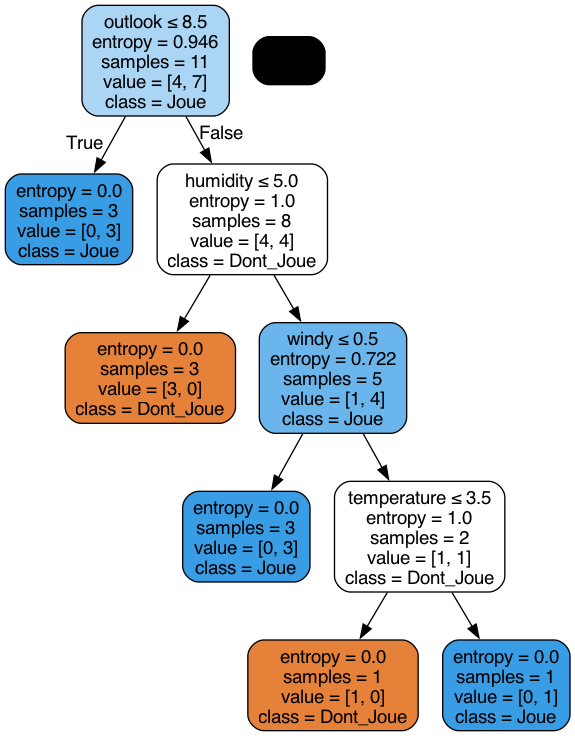

In [20]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# ZZ : nous avions les valeurs svtes pour la classe :
print(le.transform(["no", "yes"])) # donne [ 6 11]

dot_data = StringIO()
export_graphviz(clf_shanon, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue', 'Joue'])
            #special_characters=True,feature_names = feature_cols, class_names=['Joue', 'Dont_Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('meteo-entropy.png')
Image(graph.create_png())


### NB   
Quand on fait 70% et 30% :   
Contraiement à d'habitude, outlook n'est pas en tête car sa valeur est maintenant considérer comme 
un REEL (on a outlok=8.5 !!)  

Mais à 80 / 20, l'arbre change ?!

### Evaluation

In [21]:
# Model Accuracy, how often is the classifier correct?
print(y_test)
print('=====================')
print(y_pred_shanon)
print("Accuracy Shanon:",metrics.accuracy_score(y_test, y_pred_shanon))

3    11
7     6
6    11
Name: play, dtype: int64
[ 6  6 11]
Accuracy Shanon: 0.6666666666666666


### Comparons avec CART (Gini)

True

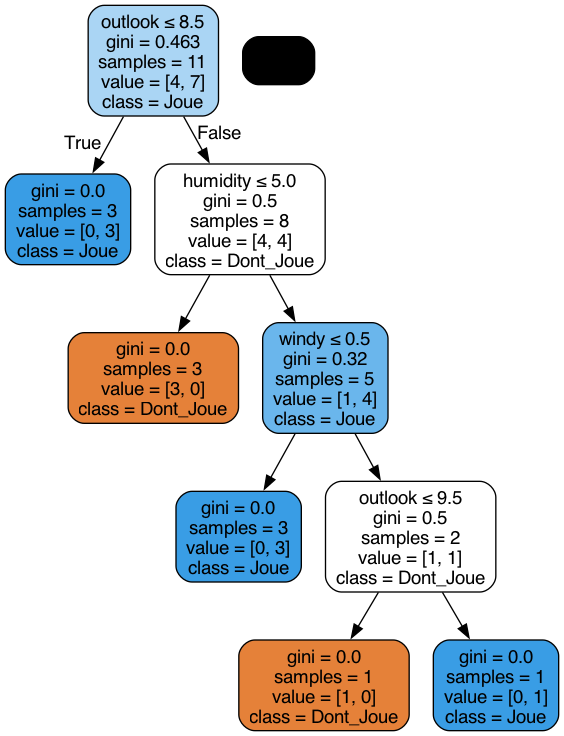

In [22]:
# Pour comparer, je fais aussi Gini
clf_gini = DecisionTreeClassifier() #PAR DEFAUT : GINI

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue','Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('meteo_gini.png')
Image(graph.create_png())


### Evaluation de Gini (CART)

In [23]:
print("Accuracy Gini:",metrics.accuracy_score(y_test, y_pred_gini))

Accuracy Gini: 0.6666666666666666


---